# Heatmap

- 各値によって色を付けた物
- 一目で値の大きさがわかる
- データの傾向を見るのにも使える

- <u>data science では特に相関表や混同行列によく使う</u>
    - *相関表　:　相関係数を表にしたもの*
        - 相関の強さを表にしたもの
    - *混同行列　:　分類器( AIモデル )がうまく分類できたもの・できなかったものを表にしたモノ*
        - 機械学習でよく使用する

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('../pandas/dataset/tmdb_5000_movies.csv')

### .corr( ) : コリレーション
- DataFrame の相関表を一発で出すことができる

In [4]:
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,-0.089377,0.505414,0.730823,0.269851,0.093146,0.593180
id,-0.089377,1.000000,0.031202,-0.050425,-0.153536,-0.270595,-0.004128
popularity,0.505414,0.031202,1.000000,0.644724,0.225502,0.273952,0.778130
revenue,0.730823,-0.050425,0.644724,1.000000,0.251093,0.197150,0.781487
runtime,0.269851,-0.153536,0.225502,0.251093,1.000000,0.375046,0.271944
vote_average,0.093146,-0.270595,0.273952,0.197150,0.375046,1.000000,0.312997
vote_count,0.593180,-0.004128,0.778130,0.781487,0.271944,0.312997,1.000000


- 相関係数は　-1 ~ 1　の値をとる
    - *1に近ければ近いほど正の相関がある*
        - **何かが増えたらもう一つの columns も増える**    
    - *-1に近ければ近いほど負の相関がある*
        - **何かの columns値が増えたらもう一つ columns値は減る**


- <u>相関係数を計算する時に汚い data のまま計算すると正しい data を得ることができない</u>
    - **信頼性の低い　data　はあらかじめ除いた上で相関表を計算する**

In [5]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


- 値が　0　のものを除いて相関表を作成したい

In [8]:
# レコード単位 (行単位)で　True or False をしたい場合は .all() .any() を使用する
(df != 0).all(axis=1)

0        True
1        True
2        True
3        True
4        True
        ...  
4798     True
4799    False
4800    False
4801    False
4802    False
Length: 4803, dtype: bool

- 行を見た時に全ての　columns が　0 ではないを　True or False で返す

In [16]:
# filter out すれば、 columns　に 0 があるレコードは省かれる
df = df[(df != 0).all(axis=1)]

# 信頼性の高い data になったので　corr( )をする
df.corr()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.015819,0.431744,0.705306,0.229712,-0.035757,0.539997
id,0.015819,1.000000,0.180645,0.031826,-0.034371,-0.050815,0.109066
popularity,0.431744,0.180645,1.000000,0.602122,0.182388,0.288189,0.749005
revenue,0.705306,0.031826,0.602122,1.000000,0.233236,0.188014,0.756143
runtime,0.229712,-0.034371,0.182388,0.233236,1.000000,0.386199,0.258101
vote_average,-0.035757,-0.050815,0.288189,0.188014,0.386199,1.000000,0.380825
vote_count,0.539997,0.109066,0.749005,0.756143,0.258101,0.380825,1.000000


### Heatmap 作成

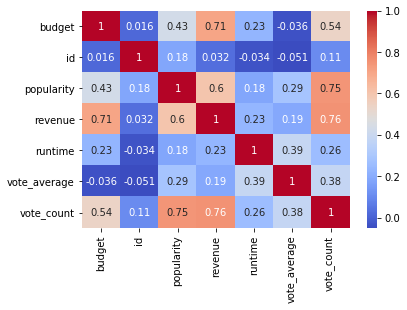

In [22]:
# 相関表をヒートマップで描画する
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # annot : 各マスに数値を入れてくれる / cmap= color を変更する

### year と month columns を作成
- year = 2000
- month = 01, 02, 03...12

In [28]:
df['year'] = df['release_date'].apply(lambda x: x[:4])
df['month'] = df['release_date'].apply(lambda x: x[5:7])

In [29]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,month
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,12


### index=month, columns=year, その年のその月の平均値を算出・プロット　
- pivot table を使用して作成する
    - pandas の関数
    1. 1度 groupby() で year と　month の平均値を出してから
    2. pivot table 作成

In [ ]:
df.groupby(['year', 'month']).mean()